In [1]:
import os, glob
import numpy as np
import pandas as pd
import math
import plotly.graph_objects as go

In [2]:
chr_name = "chr1"

In [3]:
base_dir = "/data/projects/PSB/DNABERT_data/Donor/"+chr_name

In [6]:
# Get all entities (folders and files) in the base directory
entities = os.listdir(base_dir)

# Filter only the directories
folders = [entity for entity in entities if os.path.isdir(os.path.join(base_dir, entity))]

# Sort the folders based on their numerical suffix
folders = sorted(folders, key=lambda x: int(x.replace("subfolder", "")))

In [5]:
entities

['cached_dev_80_dnaprom', 'all_data_new.tsv', 'Prediction_result', 'dev.tsv']

In [147]:
concatenated = None
# Iterate through all sorted folders
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    prediction_folder = os.path.join(folder_path, "Prediction_result")
    print(prediction_folder)

    # Check if "Prediction_result" subfolder exists
    if os.path.isdir(prediction_folder):
        # Check if "pred_results.npy" file exists
        if 'pred_results.npy' in os.listdir(prediction_folder):
            file_path = os.path.join(prediction_folder, 'pred_results.npy')
            # Load .npy file
            data = np.load(file_path)
            # If 'concatenated' is not yet initialized, copy 'data'
            if concatenated is None:
                concatenated = data.copy()
            # If 'concatenated' is already initialized, concatenate 'data'
            else:
                concatenated = np.concatenate((concatenated, data))

/data/projects/PSB/DNABERT_data/Donor/chr5/subfolder1/Prediction_result
/data/projects/PSB/DNABERT_data/Donor/chr5/subfolder2/Prediction_result
/data/projects/PSB/DNABERT_data/Donor/chr5/subfolder3/Prediction_result
/data/projects/PSB/DNABERT_data/Donor/chr5/subfolder4/Prediction_result
/data/projects/PSB/DNABERT_data/Donor/chr5/subfolder5/Prediction_result
/data/projects/PSB/DNABERT_data/Donor/chr5/subfolder6/Prediction_result
/data/projects/PSB/DNABERT_data/Donor/chr5/subfolder7/Prediction_result
/data/projects/PSB/DNABERT_data/Donor/chr5/subfolder8/Prediction_result
/data/projects/PSB/DNABERT_data/Donor/chr5/subfolder9/Prediction_result
/data/projects/PSB/DNABERT_data/Donor/chr5/subfolder10/Prediction_result
/data/projects/PSB/DNABERT_data/Donor/chr5/subfolder11/Prediction_result


In [148]:
len(concatenated)

52916204

In [149]:
np.save(base_dir+"/all_data_probab.npy", concatenated)

In [150]:
df = pd.read_csv(base_dir+"/all_data.tsv", sep= "\t")

In [151]:
df.shape

(26458102, 12)

In [152]:
df.head()

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq
0,chr5,-,150412585-150412664,ENST00000517791,150406039-150412912,rs1390400677,150412587,150412588,C,T,TCCAGGATCGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,TCTAGGATCGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...
1,chr5,-,150412585-150412664,ENST00000517791,150406039-150412912,rs777177244,150412593,150412594,C,T,TCCAGGATCGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,TCCAGGATTGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...
2,chr5,-,150412585-150412664,ENST00000517791,150406039-150412912,rs1204493918,150412594,150412595,G,A,TCCAGGATCGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,TCCAGGATCAGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...
3,chr5,-,150412585-150412664,ENST00000517791,150406039-150412912,rs530225455,150412595,150412596,G,C,TCCAGGATCGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,TCCAGGATCGCTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...
4,chr5,-,150412585-150412664,ENST00000517791,150406039-150412912,rs1483510017,150412596,150412597,T,C,TCCAGGATCGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,TCCAGGATCGGCGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...


In [153]:
concatenated[0:10]

array([0.00621908, 0.00385055, 0.00621908, 0.0034006 , 0.00621908,
       0.00516154, 0.00621908, 0.00744737, 0.00621908, 0.00916227],
      dtype=float32)

In [154]:
Reference_probab = concatenated[::2]
Alternative_probab = concatenated[1::2]

In [155]:
def log_oods_ratio(p1,p2):
    term1 = math.log2(p1/(1-p1))
    term2 = math.log2(p2/(1-p2))
    return (term1-term2)
def calculate_diff_probab(p1,p2):
    return((p2-p1)*max(p1,p2))

In [156]:
df['Ref_probab']=Reference_probab
df['Alt_probab']=Alternative_probab

In [157]:
df1= df.head(1000)

In [158]:
df['ScoreChange'] = df.apply(lambda row: calculate_diff_probab(row['Ref_probab'], row['Alt_probab']), axis=1)
df['LogOddRatio'] = df.apply(lambda row: log_oods_ratio(row['Ref_probab'], row['Alt_probab']), axis=1)

In [159]:
df.head()

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
0,chr5,-,150412585-150412664,ENST00000517791,150406039-150412912,rs1390400677,150412587,150412588,C,T,TCCAGGATCGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,TCTAGGATCGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,0.006219,0.003851,-0.000015,0.695071
1,chr5,-,150412585-150412664,ENST00000517791,150406039-150412912,rs777177244,150412593,150412594,C,T,TCCAGGATCGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,TCCAGGATTGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,0.006219,0.003401,-0.000018,0.875000
2,chr5,-,150412585-150412664,ENST00000517791,150406039-150412912,rs1204493918,150412594,150412595,G,A,TCCAGGATCGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,TCCAGGATCAGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,0.006219,0.005162,-0.000007,0.270434
3,chr5,-,150412585-150412664,ENST00000517791,150406039-150412912,rs530225455,150412595,150412596,G,C,TCCAGGATCGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,TCCAGGATCGCTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,0.006219,0.007447,0.000009,-0.261813
4,chr5,-,150412585-150412664,ENST00000517791,150406039-150412912,rs1483510017,150412596,150412597,T,C,TCCAGGATCGGTGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,TCCAGGATCGGCGTGCCCTTTCCTGGTGCTCACACATACCTCTCCG...,0.006219,0.009162,0.000027,-0.563282


In [160]:
counts, bins = np.histogram(df['LogOddRatio'], bins=25)

In [161]:
counts

array([      19,      653,     3895,     7138,    12524,    15469,
          30016,    40546,    57933,   107155,   258467,   832340,
        6438146, 16702160,  1470709,   271029,   103494,    51483,
          29109,    16128,     5234,     3997,      333,       23,
            102])

In [162]:
bins[-2]

13.879330487462116

In [163]:
df_analysis = pd.DataFrame({'Log_odd_ratio':bins[1:], 'Count':counts})
df_analysis

,Log_odd_ratio,Count
0,-15.611990,19
1,-14.329759,653
2,-13.047528,3895
3,-11.765296,7138
4,-10.483065,12524
5,-9.200834,15469
6,-7.918602,30016
7,-6.636371,40546
8,-5.354140,57933
9,-4.071908,107155


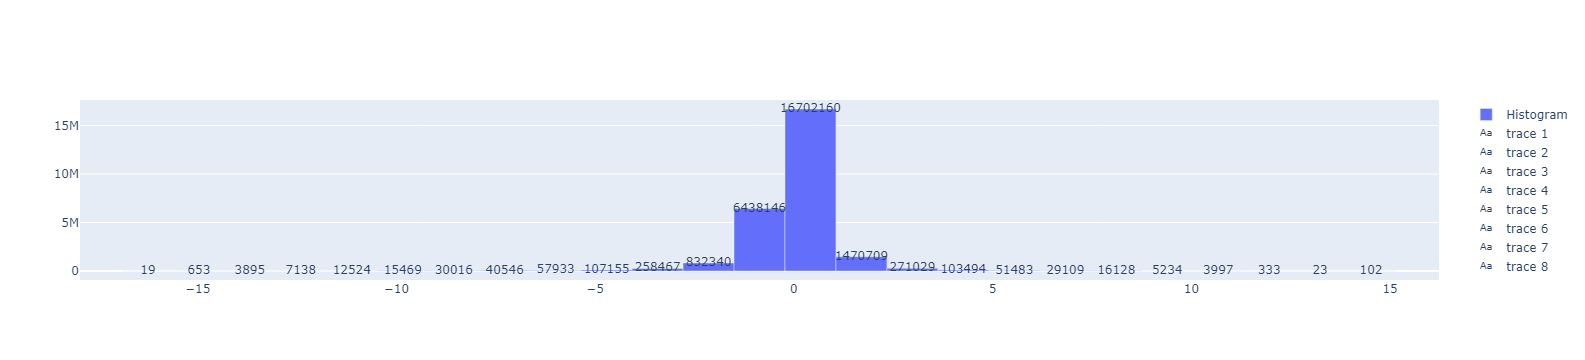

In [164]:
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

In [165]:
df_interest = df[(df['LogOddRatio']> bins[-2])|(df['LogOddRatio']<  bins[1])]
df_interest.to_csv(base_dir+"/candidates.tsv", sep= "\t", index=False)

In [166]:
df_interest

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
112199,chr5,+,168488698-168488777,ENST00000231572,168486471-168519301,rs1293579361,168488736,168488736,.,AGTCTTCAGGCAGAAAGGAACAAACCAACTAAAAATAT,ATTTAAAATTAAAGTATCGACTGAATATTCTTCGAAAGGTGAGTAC...,ATTTAAAATTAAAGTATCGACTGAATATTCTTCGAAAGAGTCTTCA...,0.994560,0.004963,-0.984213,15.161562
112201,chr5,+,168488698-168488777,ENST00000231572,168486471-168519301,rs887298502,168488736,168488737,G,C,ATTTAAAATTAAAGTATCGACTGAATATTCTTCGAAAGGTGAGTAC...,ATTTAAAATTAAAGTATCGACTGAATATTCTTCGAAAGCTGAGTAC...,0.994560,0.010470,-0.978736,14.076623
112236,chr5,+,168488698-168488777,ENST00000521329,168486470-168493958,rs1293579361,168488736,168488736,.,AGTCTTCAGGCAGAAAGGAACAAACCAACTAAAAATAT,ATTTAAAATTAAAGTATCGACTGAATATTCTTCGAAAGGTGAGTAC...,ATTTAAAATTAAAGTATCGACTGAATATTCTTCGAAAGAGTCTTCA...,0.994560,0.004963,-0.984213,15.161562
112238,chr5,+,168488698-168488777,ENST00000521329,168486470-168493958,rs887298502,168488736,168488737,G,C,ATTTAAAATTAAAGTATCGACTGAATATTCTTCGAAAGGTGAGTAC...,ATTTAAAATTAAAGTATCGACTGAATATTCTTCGAAAGCTGAGTAC...,0.994560,0.010470,-0.978736,14.076623
112273,chr5,+,168488698-168488777,ENST00000522834,168486482-168495333,rs1293579361,168488736,168488736,.,AGTCTTCAGGCAGAAAGGAACAAACCAACTAAAAATAT,ATTTAAAATTAAAGTATCGACTGAATATTCTTCGAAAGGTGAGTAC...,ATTTAAAATTAAAGTATCGACTGAATATTCTTCGAAAGAGTCTTCA...,0.994560,0.004963,-0.984213,15.161562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847142,chr5,+,73579112-73579191,ENST00000508491,73565773-73580199,rs779631776,73579126,73579126,.,CA,GAGAAGGAAATCAGTCATGTTCTTAATTTTTTGATAAGGTATGTTT...,GAGAAGGAAATCAGCATCATGTTCTTAATTTTTTGATAAGGTATGT...,0.004930,0.998346,0.991772,-16.894222
14847174,chr5,+,73579112-73579191,ENST00000296792,73565743-73583380,rs779631776,73579126,73579126,.,CA,GAGAAGGAAATCAGTCATGTTCTTAATTTTTTGATAAGGTATGTTT...,GAGAAGGAAATCAGCATCATGTTCTTAATTTTTTGATAAGGTATGT...,0.004930,0.998346,0.991772,-16.894222
14847206,chr5,+,73579112-73579191,ENST00000543251,73565741-73583377,rs779631776,73579126,73579126,.,CA,GAGAAGGAAATCAGTCATGTTCTTAATTTTTTGATAAGGTATGTTT...,GAGAAGGAAATCAGCATCATGTTCTTAATTTTTTGATAAGGTATGT...,0.004930,0.998346,0.991772,-16.894222
17432692,chr5,-,122638849-122638928,ENST00000511194,122628952-122730559,rs1382354889,122638861,122638866,AGAAG,AG,CATACATAATGGAGAAGGAGGTAAATAAGAATTAAATACCTGAAGT...,CATACATAATGGAGGAGGTAAATAAGAATTAAATACCTGAAGTCTC...,0.966532,0.001753,-0.932491,14.005663


In [167]:
df_interest['dbsnp_id'].unique()

array(['rs1293579361', 'rs887298502', 'rs779631776', 'rs1268383551',
       'rs1382354889'], dtype=object)

In [168]:
df_interest['reference_seq'].unique()

array(['ATTTAAAATTAAAGTATCGACTGAATATTCTTCGAAAGGTGAGTACTTTGGGTTCCAGTTTTATTCTCCAGTTTGAATC',
       'GAGAAGGAAATCAGTCATGTTCTTAATTTTTTGATAAGGTATGTTTTTTGTCTGTGAAACACTTACATTTTGCATCTGA',
       'GGGACCTTGCCCTAAGAGTACATGTAACATAATGTAAGGTAAGTCCTTGTTGAATCCAGCAAAATGGTATTAACTACAT',
       'CATACATAATGGAGAAGGAGGTAAATAAGAATTAAATACCTGAAGTCTCTTTTTTCTTCTGTCCTTGATTACACCACTA'],
      dtype=object)

In [169]:
df_interest.groupby(['dbsnp_id', 'ref_neucleotide','alternative_neucleotide',  'reference_seq']).size()

dbsnp_id      ref_neucleotide  alternative_neucleotide                 reference_seq                                                                  
rs1268383551  AACA             AACAACA                                 GGGACCTTGCCCTAAGAGTACATGTAACATAATGTAAGGTAAGTCCTTGTTGAATCCAGCAAAATGGTATTAACTACAT     3
rs1293579361  .                AGTCTTCAGGCAGAAAGGAACAAACCAACTAAAAATAT  ATTTAAAATTAAAGTATCGACTGAATATTCTTCGAAAGGTGAGTACTTTGGGTTCCAGTTTTATTCTCCAGTTTGAATC    49
rs1382354889  AGAAG            AG                                      CATACATAATGGAGAAGGAGGTAAATAAGAATTAAATACCTGAAGTCTCTTTTTTCTTCTGTCCTTGATTACACCACTA     4
rs779631776   .                CA                                      GAGAAGGAAATCAGTCATGTTCTTAATTTTTTGATAAGGTATGTTTTTTGTCTGTGAAACACTTACATTTTGCATCTGA    16
rs887298502   G                C                                       ATTTAAAATTAAAGTATCGACTGAATATTCTTCGAAAGGTGAGTACTTTGGGTTCCAGTTTTATTCTCCAGTTTGAATC    49
dtype: int64